In [1]:
import pdfplumber
import numpy
import cv2
from corpus_unpdf.images import FirstPage
from corpus_unpdf.images.contours import (
    get_pos_title_end, 
    get_pos_title_start, 
    get_pos_footnote_start, 
    StartPage, 
    TitlePageHeights, 
    get_page_and_img, 
    get_contours,
    is_centered,
    get_centered_coordinates
)
from corpus_unpdf.images.elements import (
    PositionCourtComposition, 
    PositionDecisionCategoryWriter,
    PositionNotice, get_footnote_coordinates
)
from pathlib import Path
from corpus_unpdf import get_img

In [2]:
target = Path().cwd() / "data" / "data5.pdf"

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.178 seconds


In [3]:
page, im = get_page_and_img(target, 0)
im_h, im_w, _ = im.shape

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.999 seconds


In [4]:
page1 = FirstPage.extract(target)
page1

FirstPage(header=<Page:1>, body=<Page:1>, composition=<CourtCompositionChoices.DIV1: 'First Division'>, notice=False, writer='HERNANDO, J.:', category=<DecisionCategoryChoices.CASO: 'Decision'>, annex=<Page:1>)

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 2.997 seconds


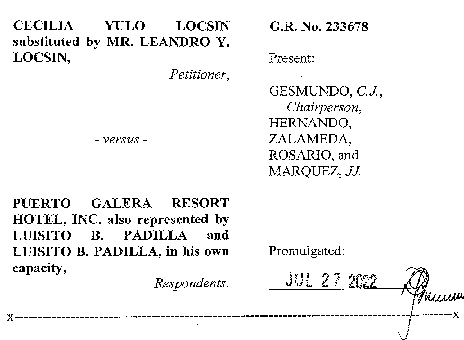

In [5]:
page1.header.to_image()

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.127 seconds


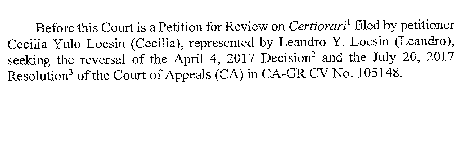

In [6]:
page1.body.to_image()

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.144 seconds


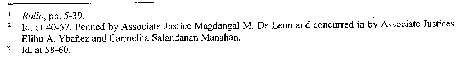

In [7]:
page1.annex.to_image()

In [8]:
page1.writer, page1.category, page1.composition

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.117 seconds


('HERNANDO, J.:',
 <DecisionCategoryChoices.CASO: 'Decision'>,
 <CourtCompositionChoices.DIV1: 'First Division'>)

In [9]:
# import pytesseract
# cv2.rectangle(im, (1160, 850), (1160 + 359, 850 + 78), (36, 255, 12), 2)
# cv2.imwrite('temp/sample.png', im[850:850+78, 1160:1160+359,])
# 850 is y axis position
# 850 + 78 = y axis + height
# 1160 is x axis position
# 1160 + 359 = x axis + width